In [1]:
2 + 1

3

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

iris_data = datasets.load_iris()

y = iris_data.target
x = iris_data.data
 
## separate
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.2, train_size = 0.8, shuffle = True)

clf = SVC()

## learning, labeling
clf.fit(x_train, y_train)

## testing
y_pred = clf.predict(x_test)

print("score: ", accuracy_score(y_pred,  y_test))

score:  0.9666666666666667


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64
              precision    recall  f1-score   support

           0       0.60      0.18      0.28        33
           1       0.94      0.99      0.97       906
           2       0.94      0.37      0.53        41

    accuracy                           0.94       980
   macro avg       0.83      0.51      0.59       980
weighted avg       0.93      0.94      0.93       980

score =  0.9408163265306122


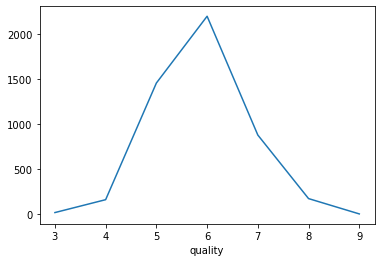

In [30]:
import pandas as pd
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

wine_csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
savepath = 'sample/winequality-white.csv'
urlretrieve(wine_csv_url, savepath)

wine_data = pd.read_csv(savepath, sep=";", encoding="utf-8")

counts = wine_data.groupby('quality')['quality'].count()
print(counts)
counts.plot()

x = wine_data.drop("quality", axis=1)
y = wine_data['quality']

new_y = []
for dy in y:
    if dy <= 4:
        new_y += [0]
    el if dy <= 7:
        new_y += [1]
    else:
        new_y += [2]

x_train, x_test, y_train, y_test = train_test_split(x, new_y, test_size=0.2, shuffle=True)
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("score = ", accuracy_score(y_test, y_pred))


average= 1.4932582984973468
max= 6.528556887060422


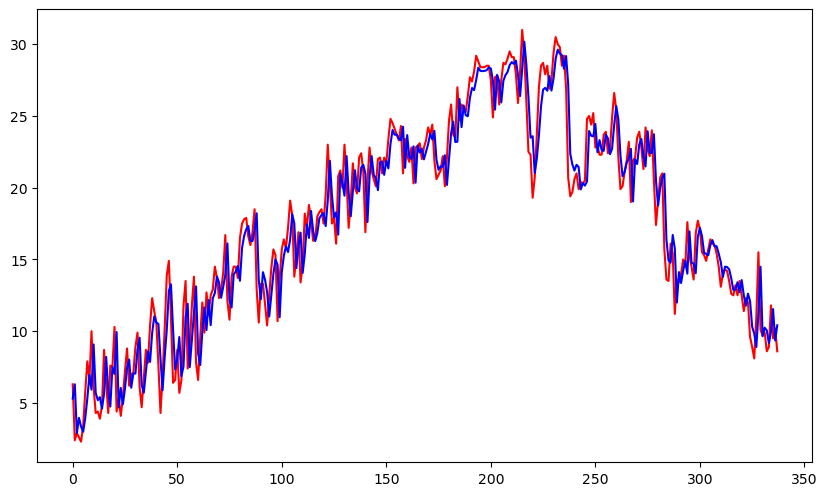

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def read_csv_data(filepath):
    csv_data = pd.read_csv(filepath, encoding='Shift-JIS')
    formatted_data = pd.DataFrame(csv_data.values[2:], columns=['年','月','日','気温','品質','均質'])
    return formatted_data
    

def make_train_and_test(data, interval):
    sample = []
    result = []
    temps = list(data['気温'])
    
    for i in range(len(temps)):
        if interval > i: continue
        result.append(float(temps[i]))
        ds = []
        
        for j in range(interval):
            ds.append(float(temps[i - interval + j]))

        sample += [ds]
    return (np.array(sample), np.array(result))

data = read_csv_data('sample/temperature.csv')
sample_years = (data['年'] <= '2020')
test_years = (data['年'] >= '2021')

make_train_and_test(data[sample_years], 6)
train_x, train_y = make_train_and_test(data[sample_years], 6)
test_x, test_y = make_train_and_test(data[test_years], 6)

clf = LinearRegression()
clf.fit(train_x, train_y)

pred_y = clf.predict(test_x)

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pred_y, c='b')

diff_y = abs(test_y - pred_y)
print('average=', sum(diff_y) / len(test_y))
print('max=', max(diff_y))